# Data Analysis: BM HR Analytics Employee Attrition & Performance

## Dataset Explanation

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Attrition is the departure of an employee from an organization for any reason (voluntary or involuntary), including resignation, termination of employment, death, or retirement. [resource](https://www.gartner.com/en/human-resources/glossary/attrition#:~:text=Attrition%20is%20the%20departure%20of,%2C%20termination%2C%20death%20or%20retirement.)

Dataset Source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Explanation of Data Analysis

This data analysis aims to analyze the relationship between employee Attrition and various factors in the company, so that the information obtained can be useful for reducing the level of Attrition.

## Feature Description

Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

## Overview

> Load the data data

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")

> Show first and last 5 data

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


> Show the data information

In [5]:
pd.DataFrame({'Features': df.columns,
              'dataType': df.dtypes.values,
              'nullvalues': [df[i].isna().sum() for i in df.columns],
              'unique': [df[i].nunique() for i in df.columns],
              'uniqueSample': [list(pd.Series(df[i].unique()))
                               for i in df.columns]}).reset_index(drop=True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Age,int64,0,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,object,0,2,"[Yes, No]"
2,BusinessTravel,object,0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,int64,0,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,object,0,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,int64,0,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,int64,0,5,"[2, 1, 4, 3, 5]"
7,EducationField,object,0,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,int64,0,1,[1]
9,EmployeeNumber,int64,0,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


> There is 34 columns and there is no null values

## Data Preprocessing

> We will not fill in a null value because there is no null value in the dataset.

> Separate numeric and categorical data.

> We will not use the `employee number` because it is neither categorical nor numeric.

> Eliminate the  `Over18`, `StandardHours`, and `EmployeeCount` columns as they are considered to have no effect on the analysis.

In [6]:
df_num = df[['Age', 'DailyRate', 'DistanceFromHome',
             'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
             'PercentSalaryHike', 'TotalWorkingYears',
             'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager']]
df_num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,11,8,0,6,4,0,5
1,49,279,8,61,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,3,8,7,3,0
4,27,591,2,40,3468,16632,9,12,6,3,2,2,2,2


> Uses `describe()` to see the measure of central tendency, quartile, min, and max for each feature.

In [7]:
df_num.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df_ctg = df[['Attrition', 'BusinessTravel', 'Department', 'Education',
             'EducationField', 'EnvironmentSatisfaction', 'Gender',
             'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
             'MaritalStatus', 'OverTime', 'PerformanceRating',
             'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']]
df_ctg.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3


> Uses `describe()` to see unique (different categories), top (most data appears), and freq (frequently appearing data) values for categorical data.

In [9]:
df_ctg.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [10]:
df_ctg.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,1470.0,2.712245,1.081209,1.0,2.0,3.0,4.0,4.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0


## Exploratory Data Analysis (EDA)

> Start this process by looking at the target feature first.

### Target Feature

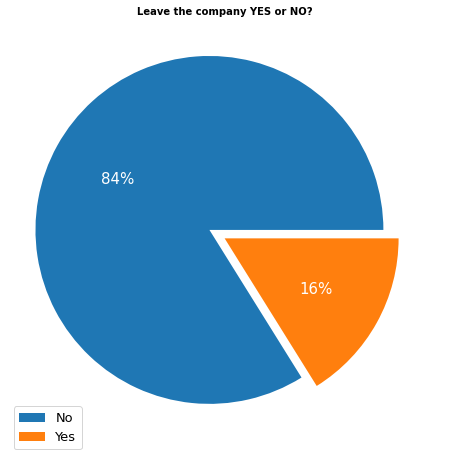

In [11]:
plt.figure(figsize=(10, 8))
plt.title("Leave the company YES or NO?", size=10, fontweight='bold')
plt.pie(df_ctg['Attrition'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()

In [12]:
df_ctg['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

> From the data above, there are 84% (1233) employees who do not leave the company out of 1470 employees.

### Numerical Features

<AxesSubplot:>

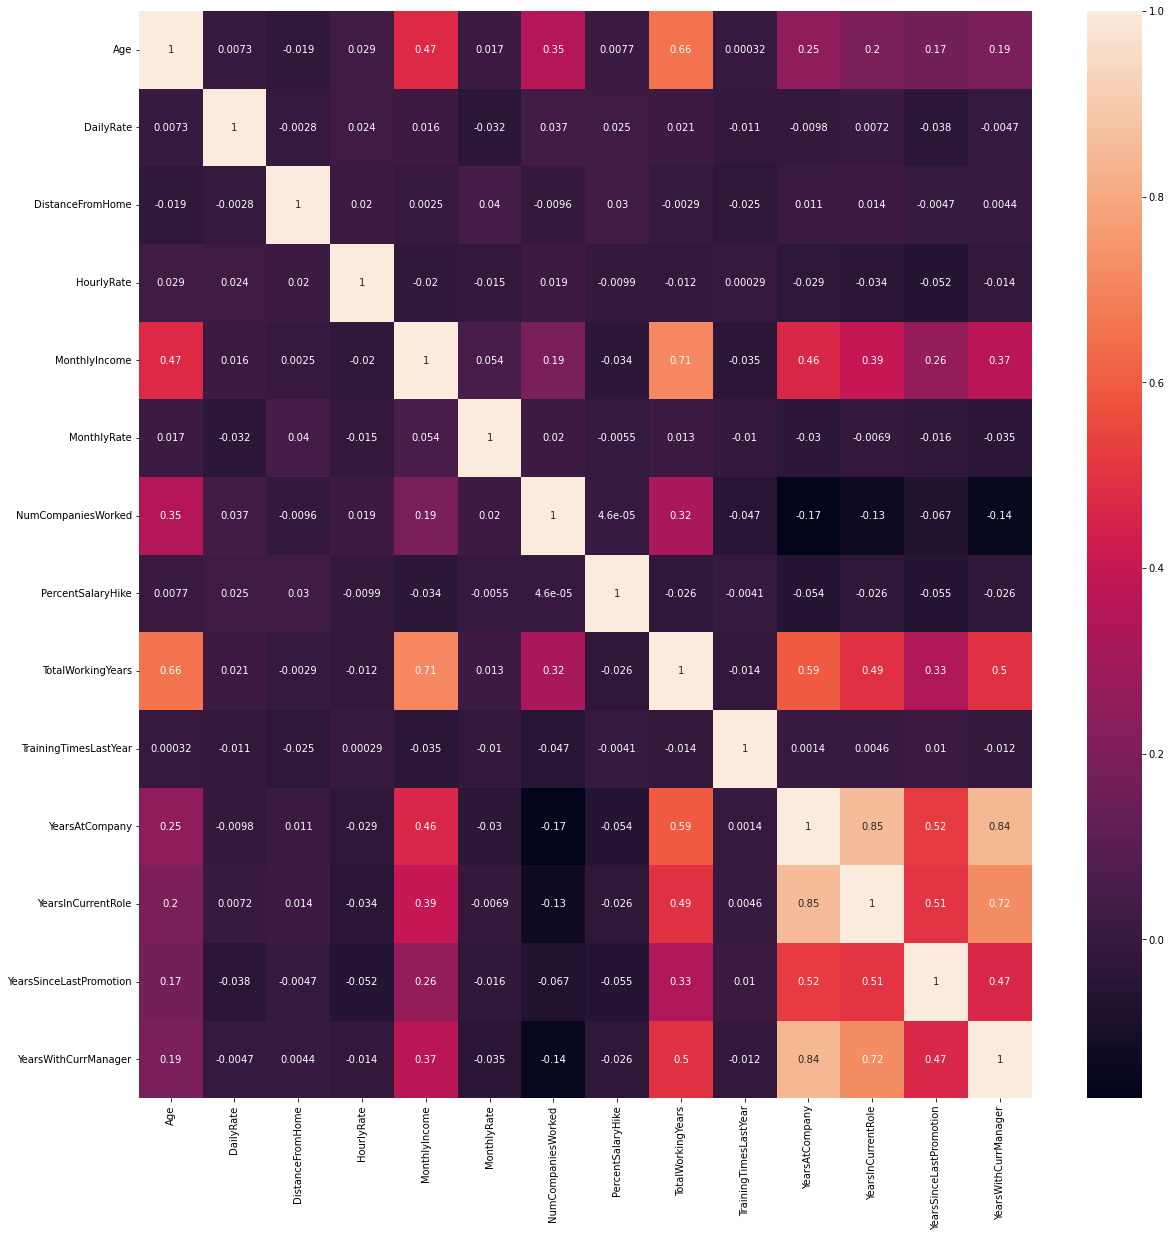

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_num.corr('spearman'), annot=True)

> There is a correlation coefficient in the numerical data above
> 1. `YearsAtCompany` with `YearsInCurrentRole` (0.85) and `YearsWithCurrManager` (0.84)
> 2. `YearsInCurrentRole` with `YearsInCurrManager` (0.72)
> 3. `MonthlyIncome` with `TotalWorkingYears` (0.71)

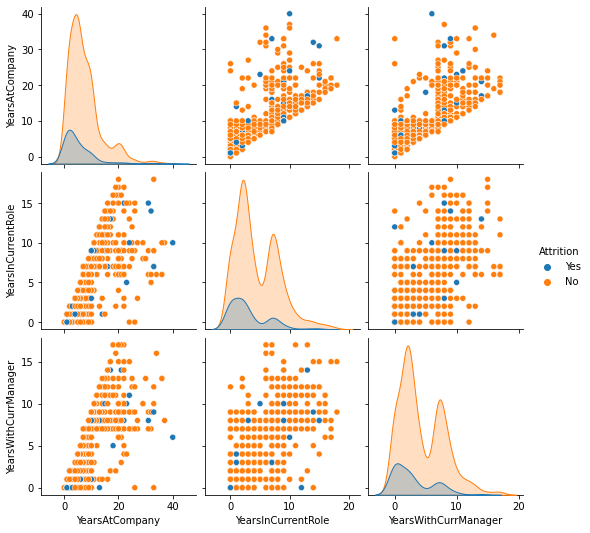

In [14]:
sns.pairplot(df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition']],
             hue="Attrition")

> It can be seen from the `pairplot` above, that employees who do a lot of `Attrition` are employees who have `worked in the company` or in the `same role` or with the `same manager` if their tenure is **less than 10 years**. Meanwhile, the longer they work in the company or in the same role or with the same manager, the lower the level of Attrition.

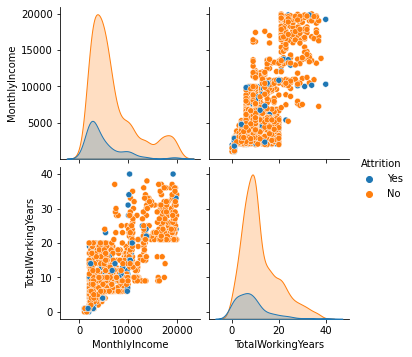

In [15]:
sns.pairplot(df[['MonthlyIncome', 'TotalWorkingYears', 'Attrition']],
             hue="Attrition")

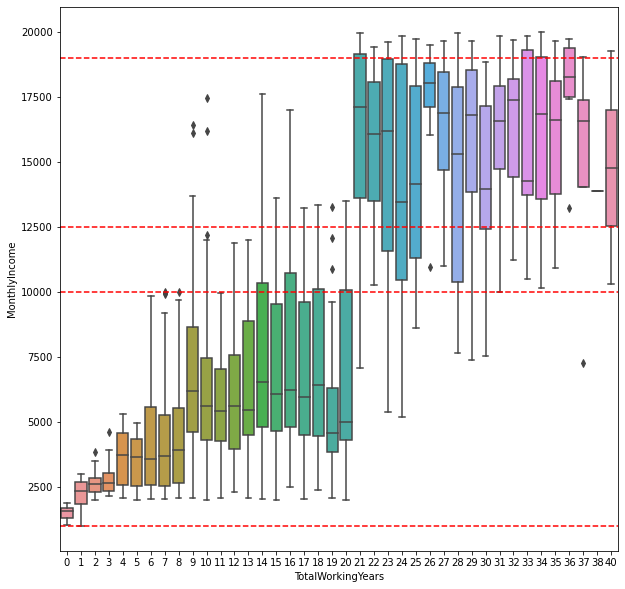

In [16]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['MonthlyIncome'],
            x=df['TotalWorkingYears'])
reference = [1000, 10000, 12500, 19000]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

> From the `boxplot` above, information is obtained that `MonthlyIncome` has a relationship with `TotalWorkingYears`, where the **longer a person has been working**, the **salary will increase**. A significant increase is in the 21st year of a person working, where in **years 0 - 20** workers have an average income **between 1000 - 10000**. When they enter the **year 21 and above**, they can get an **average salary between 12500 - 19000**.

In [17]:
def visualize_data(column_name):
    attr = df[(df['Attrition'] == 'Yes')][column_name]
    not_attr = df[(df['Attrition'] == 'No')][column_name]

    plt.figure(figsize=(12, 6))
    ax = sns.distplot(not_attr)
    ax = sns.distplot(attr)

    ax.legend(['No', 'Yes'])

    plt.xlabel(column_name, fontsize=12)
    plt.title('Distribution of Attrition by ' + column_name, fontsize=22)
    plt.tight_layout()
    plt.show()

    print(f"Attrition by {column_name}")
    print(attr.value_counts().head())
    print(f"Not Attrition by {column_name}")
    print(not_attr.value_counts().head())

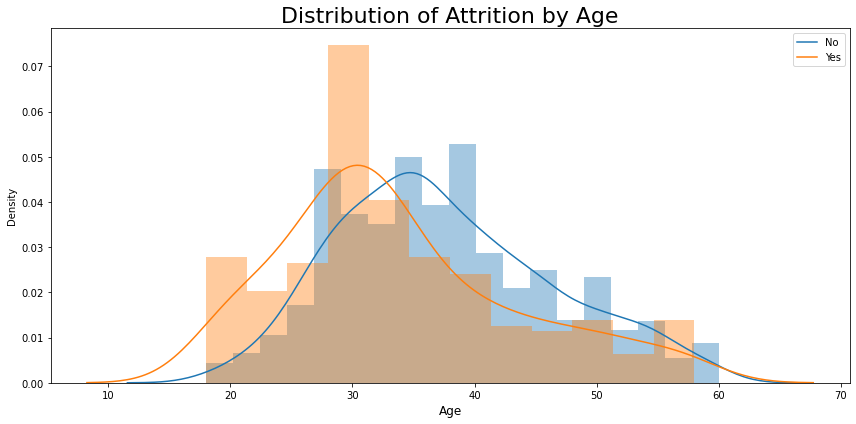

Attrition by Age
31    18
29    18
28    14
33    12
26    12
Name: Age, dtype: int64
Not Attrition by Age
34    68
35    68
36    63
38    56
40    52
Name: Age, dtype: int64


In [18]:
visualize_data("Age")

> From the `plot` above, information is obtained that most employees who do `Attrition` are employees aged **between 26 - 31 years**, this may be because they want to seek knowledge and experience in other companies that cause them to Attrition. Meanwhile, employees over the **age of 34** are less likely to perform `Attrition`.

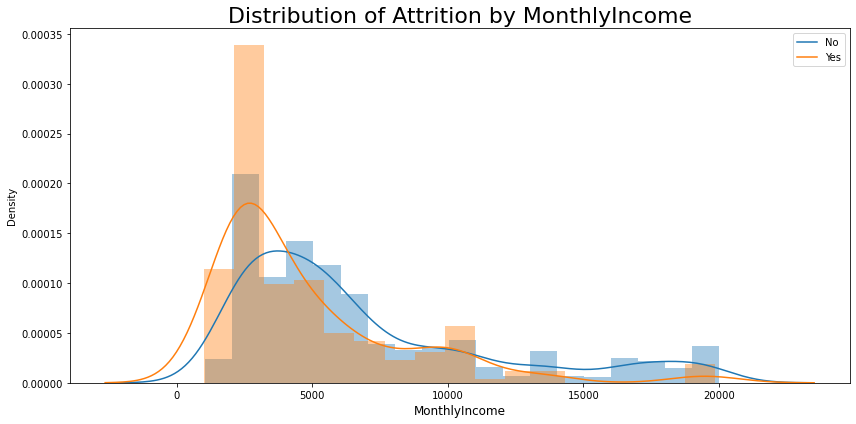

Attrition by MonthlyIncome
5346    2
2293    2
2362    2
2404    2
5993    1
Name: MonthlyIncome, dtype: int64
Not Attrition by MonthlyIncome
2559    3
3452    3
2451    3
5562    3
6142    3
Name: MonthlyIncome, dtype: int64


In [19]:
visualize_data("MonthlyIncome")

> The information obtained from the `distribution` above is that many workers `Attrition` because they have a **salary below 5000**, the higher the salary the employee gets, the lower the likelihood that they will perform attrition.

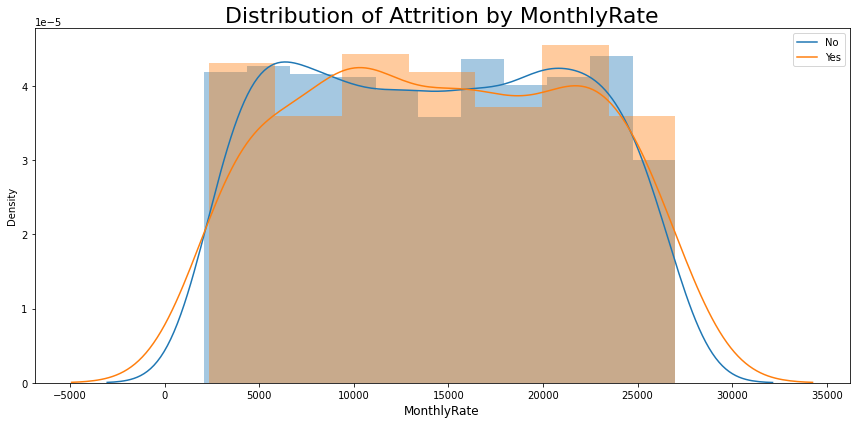

Attrition by MonthlyRate
9150     2
19479    1
23288    1
25308    1
14075    1
Name: MonthlyRate, dtype: int64
Not Attrition by MonthlyRate
2755     2
15891    2
8952     2
6670     2
25326    2
Name: MonthlyRate, dtype: int64


In [20]:
visualize_data("MonthlyRate")

> From the data above, it can be concluded that `MonthlyRate` has no effect on Attrition because the distribution is quite even.

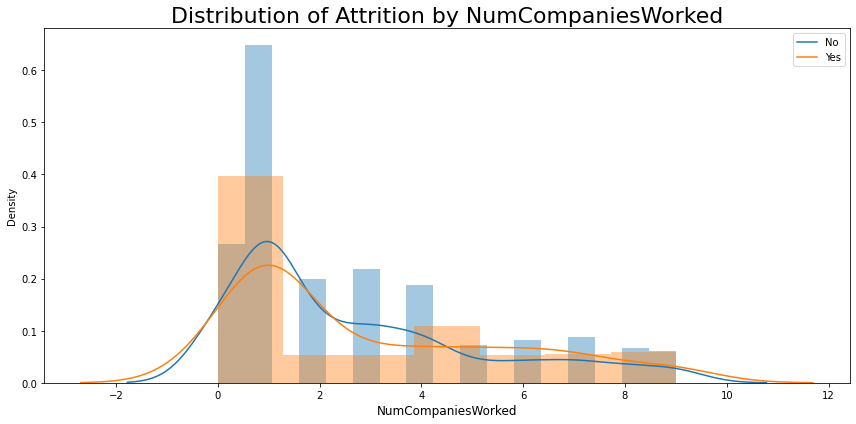

Attrition by NumCompaniesWorked
1    98
0    23
7    17
4    17
6    16
Name: NumCompaniesWorked, dtype: int64
Not Attrition by NumCompaniesWorked
1    423
0    174
3    143
2    130
4    122
Name: NumCompaniesWorked, dtype: int64


In [21]:
visualize_data("NumCompaniesWorked")

> From the `plot` above, it is found that those who have **new experience in 0-1 companies** will do more `Attrition`, this can be related to the new experience they want to seek in other companies.

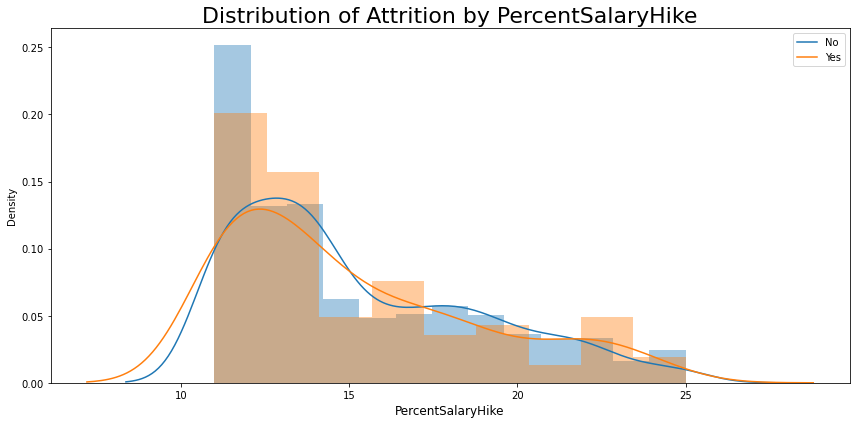

Attrition by PercentSalaryHike
11    41
13    34
12    33
14    24
15    18
Name: PercentSalaryHike, dtype: int64
Not Attrition by PercentSalaryHike
14    177
13    175
11    169
12    165
15     83
Name: PercentSalaryHike, dtype: int64


In [22]:
visualize_data("PercentSalaryHike")

> From the data above, it can be concluded that the smaller the salary increase received by the workers, the greater the chance that they will perform Attrition.

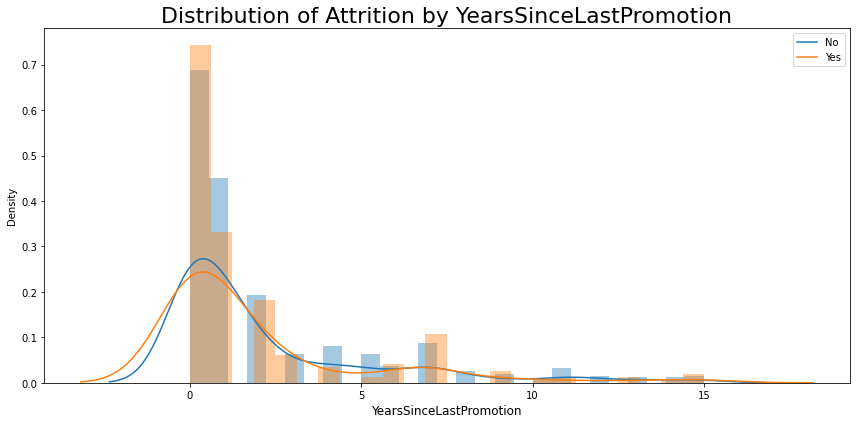

Attrition by YearsSinceLastPromotion
0    110
1     49
2     27
7     16
3      9
Name: YearsSinceLastPromotion, dtype: int64
Not Attrition by YearsSinceLastPromotion
0    471
1    308
2    132
7     60
4     56
Name: YearsSinceLastPromotion, dtype: int64


In [23]:
visualize_data("YearsSinceLastPromotion")

> Employees who have never been promoted are more likely to Attrition.

### Categorical Data

> Calculates the correlation on each feature.

> Change categorical string data to numeric categorical.

In [24]:
df_ctg_num = df_ctg.select_dtypes(exclude=['object'])
df_ctg_obj = df_ctg.select_dtypes(exclude=['float', 'int'])
for i in df_ctg_obj.columns:
    df_ctg_num[i] = df_ctg_obj[i].astype('category').cat.codes

In [25]:
df_ctg_num.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,2,2,3,2,4,3,1,0,1,1,2,2,1,0,7,2,1
1,1,3,2,2,2,4,4,1,3,0,1,1,1,1,6,1,0
2,2,4,2,1,3,3,2,0,3,1,2,1,4,1,2,2,1
3,4,4,3,1,3,3,3,0,3,0,1,1,1,0,6,1,1
4,1,1,3,1,2,3,4,1,3,0,2,1,3,1,2,1,0


<AxesSubplot:>

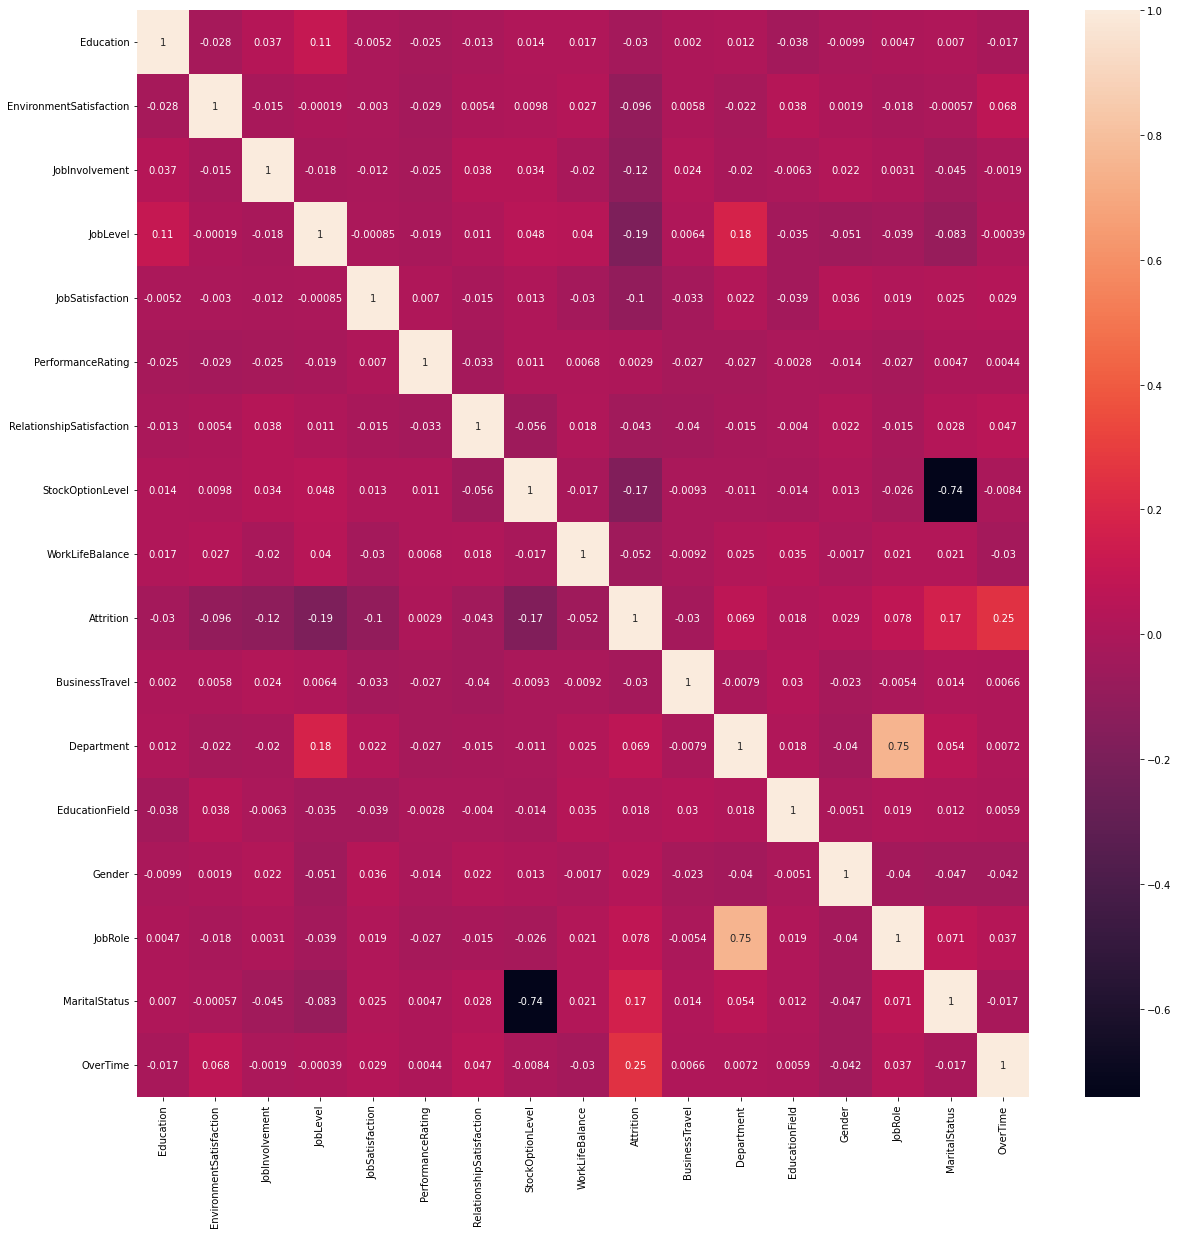

In [26]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_ctg_num.corr('spearman'), annot=True)

> From the data above, it can be seen that the one with a **strong correlation coefficient** is the `Department` column with a `JobRole` of **0.75**.

In [27]:
pd.crosstab(df_ctg['Department'], df_ctg['JobRole'], normalize=True)

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Department,,,,,,,,,
Human Resources,0.000000,0.035374,0.00000,0.007483,0.000000,0.000000,0.000000,0.000000,0.000000
Research & Development,0.089116,0.000000,0.17619,0.036735,0.098639,0.054422,0.198639,0.000000,0.000000
Sales,0.000000,0.000000,0.00000,0.025170,0.000000,0.000000,0.000000,0.221769,0.056463


> From the data above, it can be seen that 22% of the employees who left came from the Sales department with the role of Sales Executive.

In [28]:
def visualize_ctg_data(column_name):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column_name, data=df_ctg, hue='Attrition')
    plt.legend(loc='upper right', fontsize=13)
    plt.xlabel(column_name, fontsize=20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.heatmap(pd.crosstab(df_ctg[column_name], df_ctg['Attrition'], normalize=True),
                annot=True)

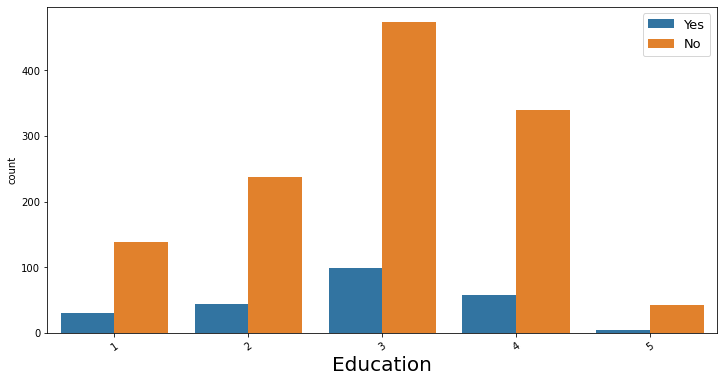

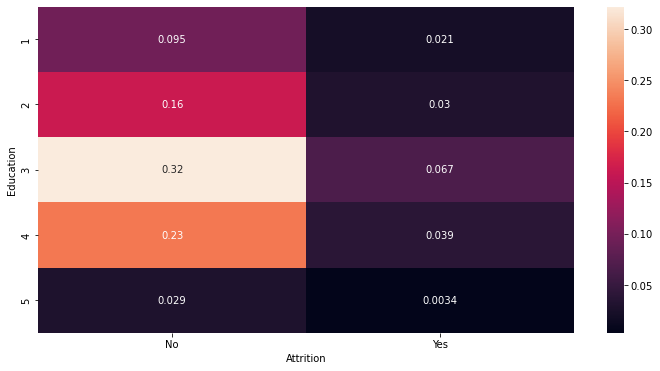

In [29]:
visualize_ctg_data("Education")

> 

Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

> From the data above, information is obtained that employees who resign a lot are employees who have a **bachelor's education**.

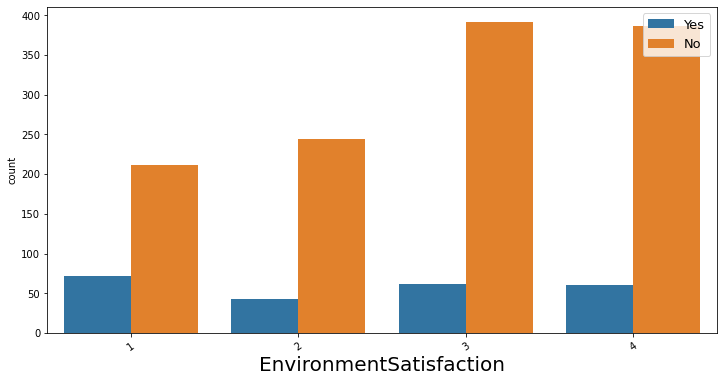

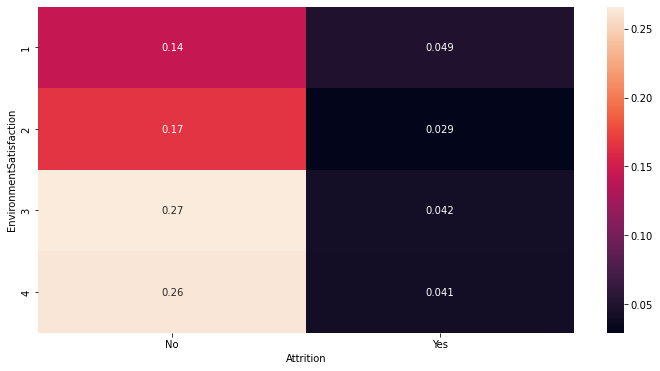

In [30]:
visualize_ctg_data("EnvironmentSatisfaction")

> It can be concluded from the plot above that many employees who have `EnvironmentSatisfaction` **above 3** do not do `Attrition`. Meanwhile, the smaller the `EnviromentSatisfaction`, the greater the chance that the employee will perform `Attrition`.

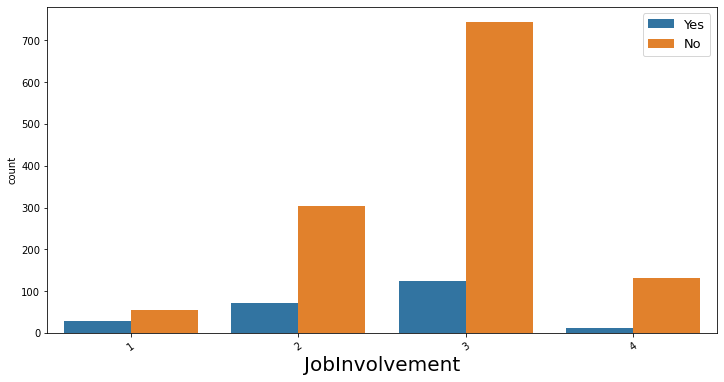

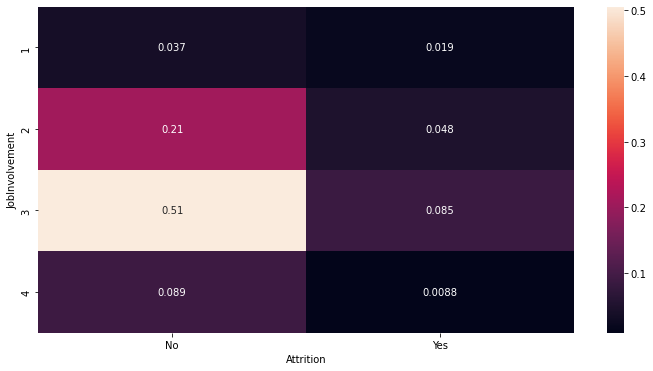

In [31]:
visualize_ctg_data("JobInvolvement")

> It can be concluded from the `plot` above that many employees who have `JobInvolvement` **above 3** `do not Attrition`. Meanwhile, the **smaller the JobInvolvement**, the **greater the chance** that the employee will `Attrition`.

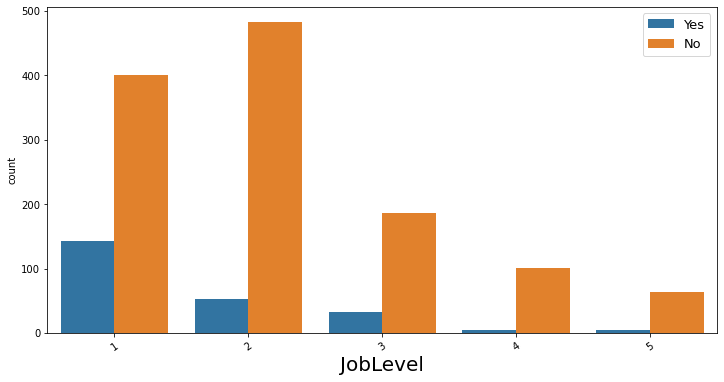

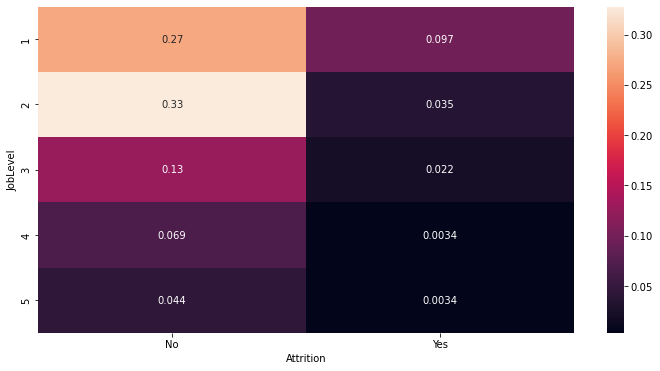

In [32]:
visualize_ctg_data("JobLevel")

> It can be concluded from the `plot` above that employees who have `JobLevels` **below 3** will have a **greater chance** that they will do `Attrition`.

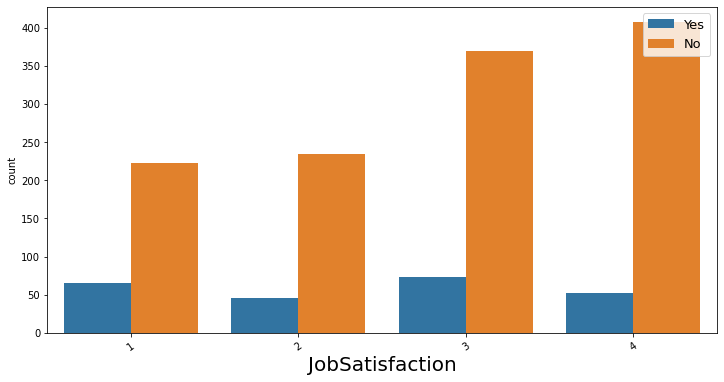

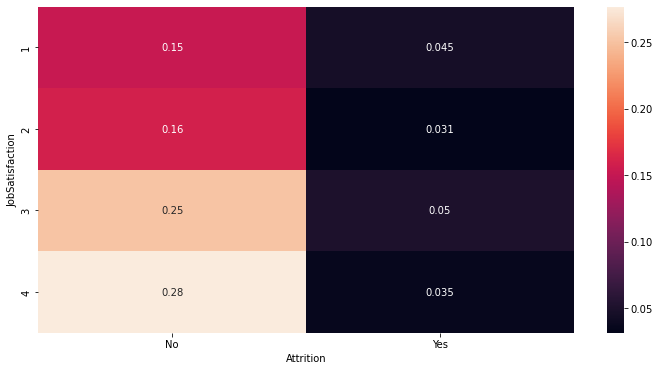

In [33]:
visualize_ctg_data("JobSatisfaction")

> From the data above, information is obtained when employees have high `JobSatisfaction` they will tend `not to Attrition`, and **vice versa**.

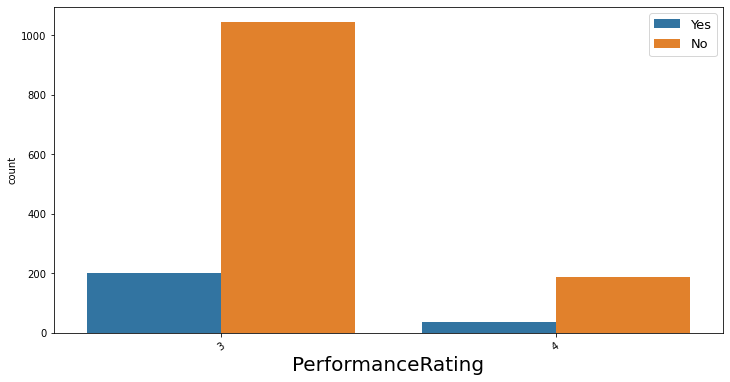

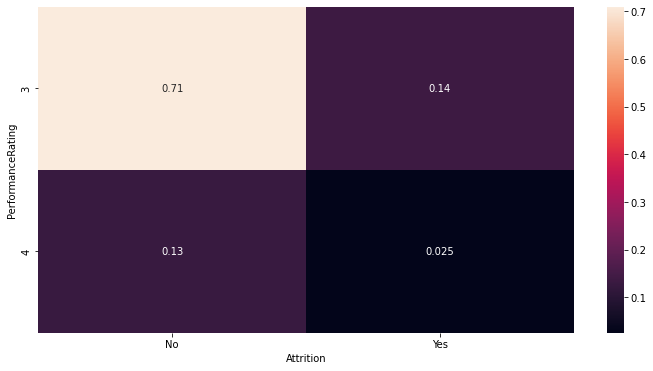

In [34]:
visualize_ctg_data("PerformanceRating")

> The data above shows that employees who work in this company have at least a `PerformanceRating` of **3 and the higher** their rating, the **less** they will do `Attrition`.

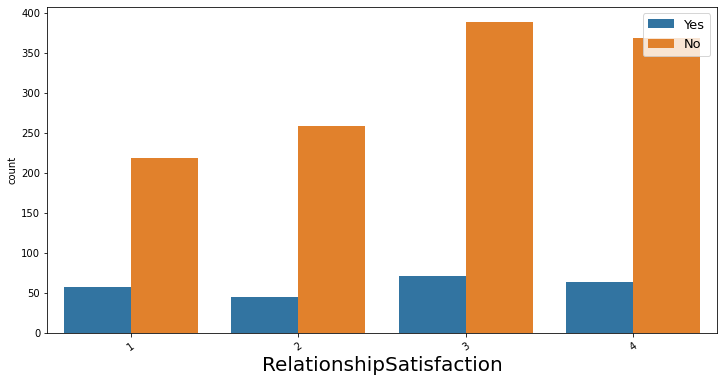

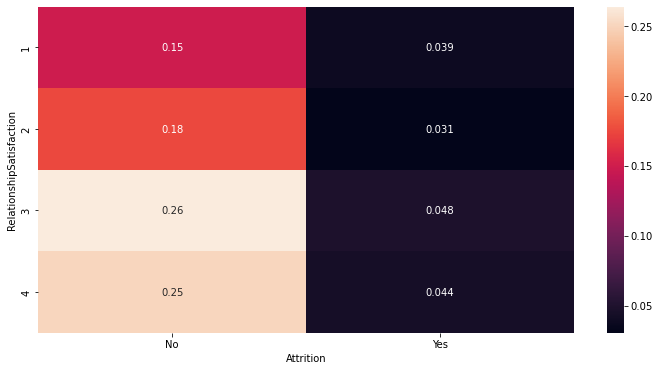

In [35]:
visualize_ctg_data("RelationshipSatisfaction")

> `RelationshipsSatiscation` between coworkers affect `Attrition`, where employees who have **bad relationships** are more likely to **do Attrition**.

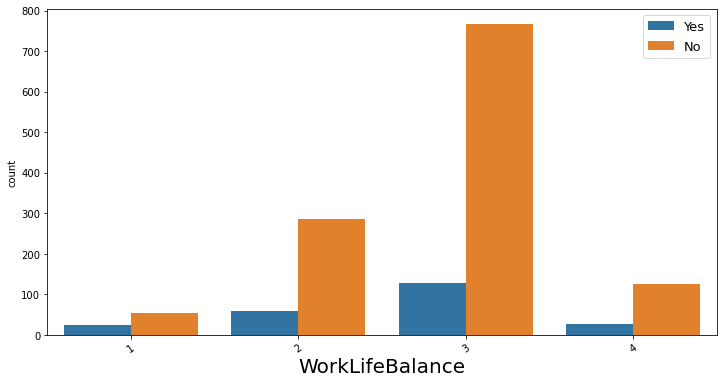

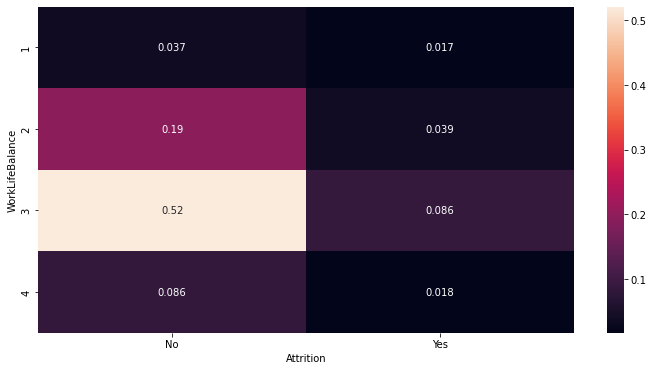

In [36]:
visualize_ctg_data("WorkLifeBalance")

> `WorkLifeBalance` affects `Attrition`, where when employees have a **good work life balance**, the probability of doing **Attrition will be lower**.

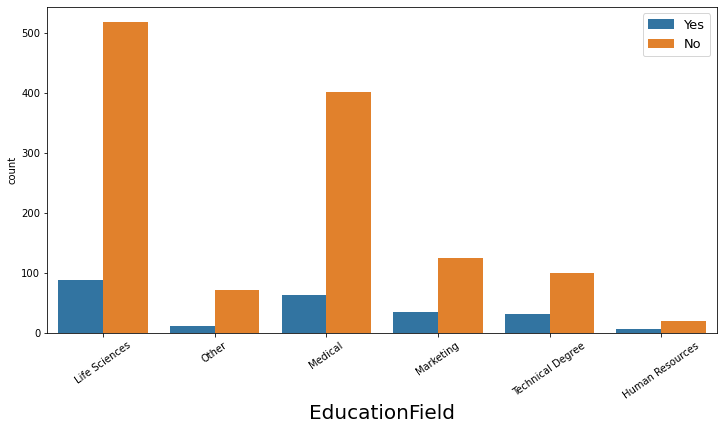

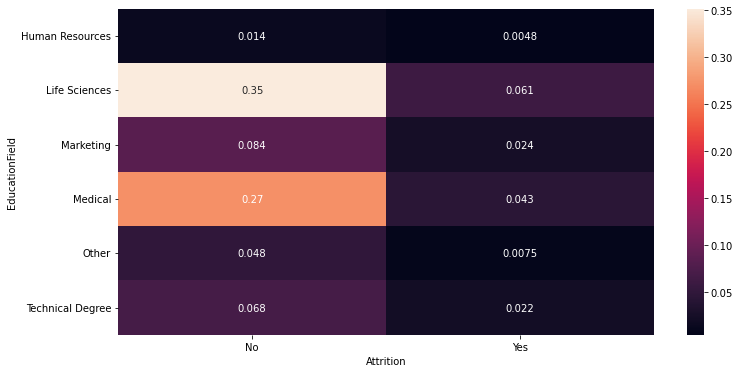

In [39]:
visualize_ctg_data("EducationField")

> From the data above, it can be seen that those who have an `EducationField` in **Life Sciences** tend to have a **high level** of `Attrition`, while those who have an `EducationField` in **Human Resources or others** have **less `Attrition`**.

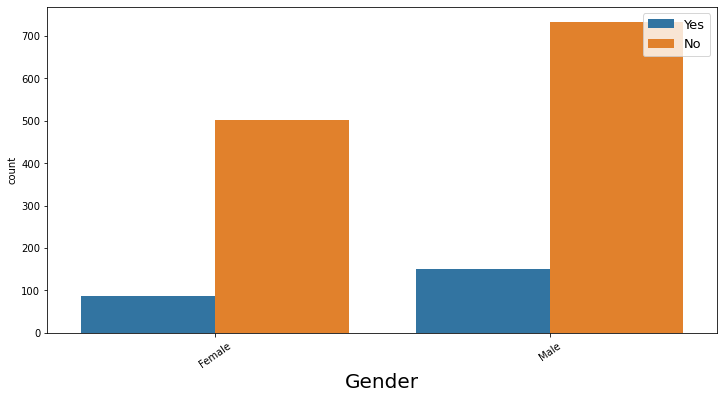

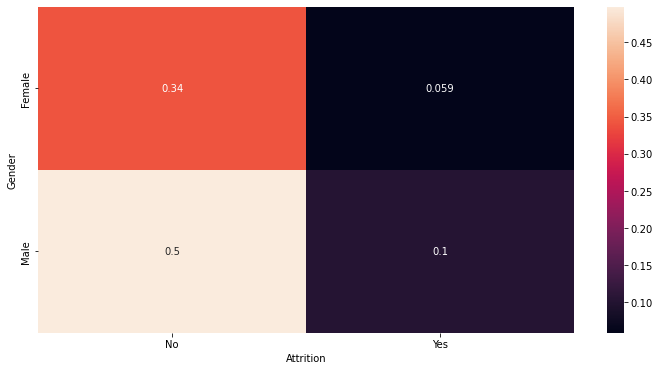

In [40]:
visualize_ctg_data("Gender")

> This company has more male employees than female, directly proportional to the level of Attrition, where more men do `Attrition`.

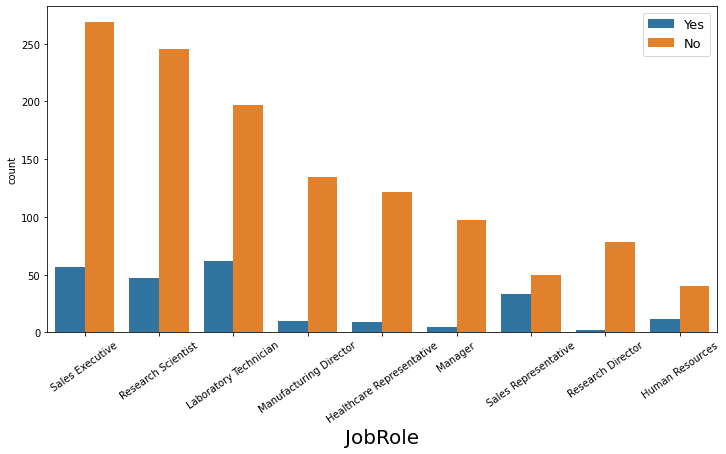

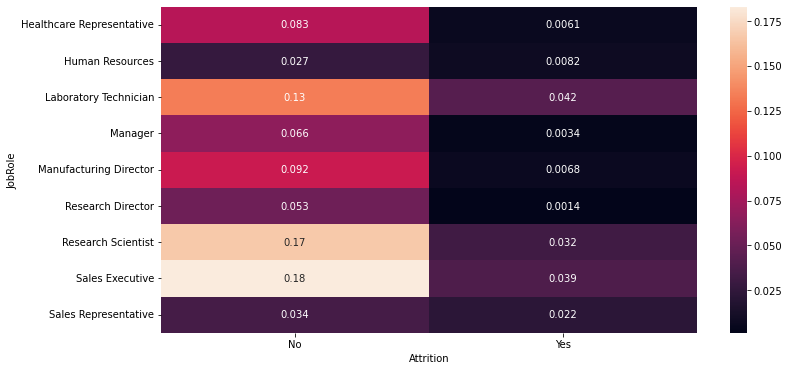

In [41]:
visualize_ctg_data("JobRole")

> `JobRole` **Sales Executive** is the job with the **most Attrition**, followed by **Research Scientist**.

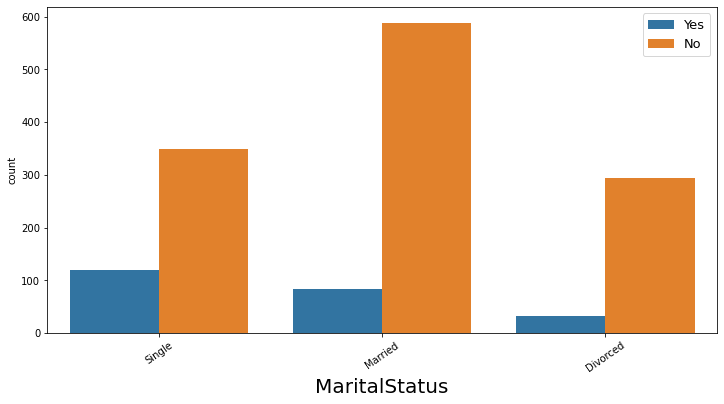

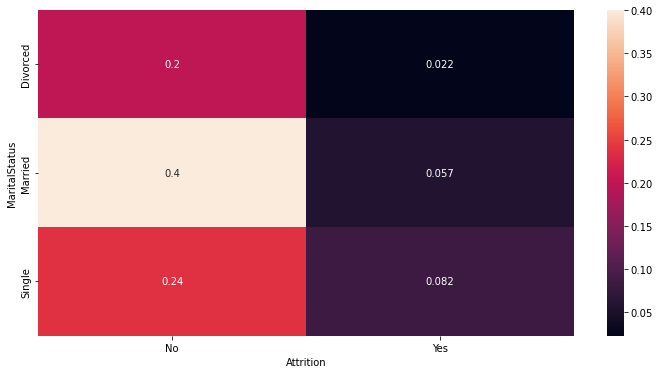

In [42]:
visualize_ctg_data("MaritalStatus")

> Employees who have `MaritalStatus` **married** are the employees who do **not Attrition** the most, this may be because they must have the **financial stability** to support their families.

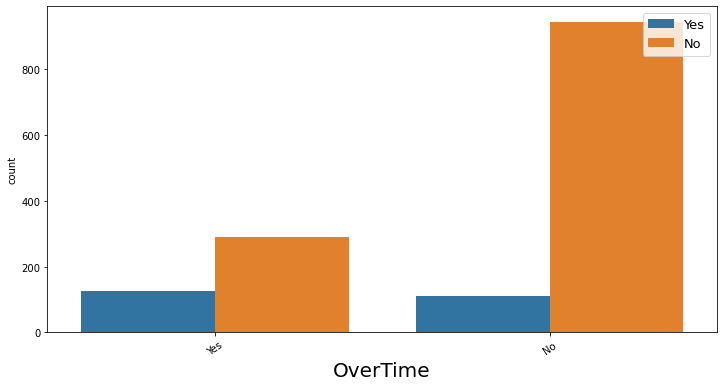

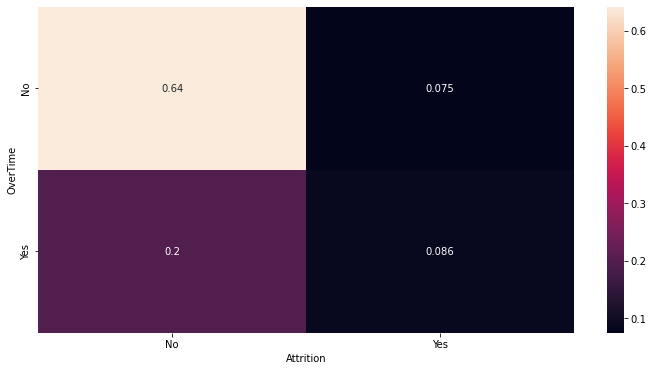

In [44]:
visualize_ctg_data("OverTime")

> `Overtime` employees will choose `Attrition`, this can also be related to work-life balance, where the smaller the work-life balance, the more likely it is for someone to do `Attrition`.

## Summary

1. Employees who work under 10 years tend to do Attrition.
2. Employees aged 26 - 31 will do more attrition, while those aged over 34 years will do less Attrition.
3. The longer the experience of the employee, the salary of the employee will also continue to increase.
4. The more significant the salary, experience, and salary increase given will make employees less likely to do Attrition.
5. More male employees than female employees and more male employees who do Attrition.
6. The lower the environment satisfaction, job satisfaction, job involvement, job level, performance rating, relationship satisfaction, and work-life balance will make the chances of employees doing Attrition higher.
7. Jobs as Sales Executive and Research Scientist are jobs that have the highest Attrition level.
8. Martial Status affects Attrition, those who are married will tend not to Attrition.
9. When an employee does Over Time, it will increase the opportunity for the employee to do Attrition.